<a href="https://colab.research.google.com/github/babuus/Machine-Learning/blob/master/cnn_palm_fist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.gti.ssr.upm.es/images/Data/Downloads/HandGestureDatabase/set_1.rar
!unrar x '/content/set_1.rar'

In [ ]:
import os
import PIL
import cv2
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x '/content/drive/MyDrive/Dataset/palm_fist.rar' '/content/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/palm_fist.rar

Creating    /content/Training                                         OK
Creating    /content/Training/fist                                    OK
Creating    /content/Training/fist/fist_set_01                        OK
Extracting  /content/Training/fist/fist_set_01/dr_0_1327.png               0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_1327.xml               0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_149.png                0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_149.xml                0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_1760.png               0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_1760.xml               0%  OK 
Extracting  /content/Training/fist/fist_set_01/dr_0_2330.png               0%  OK 
Extrac

In [ ]:
data_dir = pathlib.Path("/content/Training")
data_dir

PosixPath('/content/Training')

In [ ]:
len(list(data_dir.glob('*/*/*.png'))), len(list(data_dir.glob('palm/*')))

(613, 6)

In [ ]:
hand_dict = {
'fist' : list(data_dir.glob('fist/*/*.png')),
'palm' : list(data_dir.glob('palm/*/*.png')),
}

hand_labels_dict = {
    'fist': 0,
    'palm': 1,
}

In [ ]:
img = cv2.imread(str(hand_dict['fist'][0]))
img.shape

(600, 600, 3)

In [ ]:
X, y = [], []

for hand_name, images in hand_dict.items():
    print(hand_name, ":", len(images))
    for image in images:
      try:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img, (180, 180))
        X.append(resize_image)
        y.append(hand_labels_dict[hand_name])
      except:
        pass

fist : 308
palm : 305


0 shape (180, 180, 3)


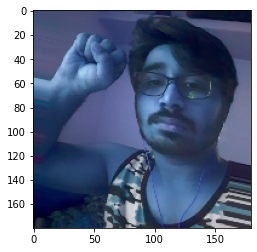

In [ ]:
print(y[100], 'shape', X[100].shape)
plt.imshow(X[100]);

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([228, 231])), (array([0, 1]), array([80, 74])))

In [ ]:
X_train_scl = X_train / 255
X_test_scl = X_test / 255
len(X_train_scl), len(y_train), X_train_scl.shape

(459, 459, (459, 180, 180, 3))

In [ ]:
cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', input_shape=(180,180,3)))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(3, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 178, 178, 5)       140       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 89, 89, 5)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 87, 87, 64)        2944      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 25600)            

In [ ]:
history = cnn.fit(X_train_scl, y_train, epochs = 10)

Epoch 1/10
15/15 [==============================] - 14s 910ms/step - loss: 0.8030 - accuracy: 0.5229
Epoch 2/10
15/15 [==============================] - 14s 905ms/step - loss: 0.5322 - accuracy: 0.7516
Epoch 3/10
15/15 [==============================] - 14s 912ms/step - loss: 0.3278 - accuracy: 0.8279
Epoch 4/10
15/15 [==============================] - 14s 915ms/step - loss: 0.1587 - accuracy: 0.9477
Epoch 5/10
15/15 [==============================] - 14s 921ms/step - loss: 0.0675 - accuracy: 0.9782
Epoch 6/10
15/15 [==============================] - 14s 920ms/step - loss: 0.0376 - accuracy: 0.9913
Epoch 7/10
15/15 [==============================] - 14s 906ms/step - loss: 0.0164 - accuracy: 0.9978
Epoch 8/10
15/15 [==============================] - 14s 914ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 9/10
15/15 [==============================] - 14s 918ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/10
15/15 [==============================] - 14s 917ms/step - loss: 0.0021 - accura

In [ ]:
cnn.evaluate(X_test_scl, y_test)

5/5 [==============================] - 2s 307ms/step - loss: 0.0475 - accuracy: 0.9870


[0.04748081415891647, 0.9870129823684692]

In [ ]:
fist_babu = []
babu_test = list(pathlib.Path("/content/set_1/test/subject_1").glob('*'))
for image in babu_test:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img, (180, 180))
        fist_babu.append(resize_image)
fist_babu = np.array(fist_babu)
fist_babu.shape

(439, 180, 180, 3)

In [ ]:
pred = cnn.predict(fist_babu)
print(np.argmax(0))

0


In [ ]:
pred[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
pred = cnn.predict(X_test_scl)
arr_pred = np.array([np.argmax(i) for i in pred])
arr_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
pred

array([[3.07835813e-04, 9.99692202e-01, 1.95383179e-13],
       [5.05143871e-05, 9.99949455e-01, 1.29307214e-17],
       [9.98260796e-01, 1.73916796e-03, 1.66252996e-17],
       [8.03536296e-01, 1.96463719e-01, 1.09825950e-12],
       [9.97119784e-01, 2.88024009e-03, 6.07842713e-19],
       [9.00107801e-01, 9.98921543e-02, 2.81465525e-13],
       [2.68385520e-07, 9.99999762e-01, 3.68367114e-21],
       [3.73987350e-05, 9.99962568e-01, 1.88325021e-17],
       [9.99972701e-01, 2.73532460e-05, 2.32655632e-17],
       [4.18913275e-01, 5.81086755e-01, 5.43962356e-14],
       [1.66678720e-03, 9.98333275e-01, 4.13534826e-34],
       [4.47873390e-05, 9.99955177e-01, 2.49339611e-19],
       [9.99999881e-01, 6.86775721e-08, 9.37759945e-36],
       [9.99998450e-01, 1.55254259e-06, 1.10087287e-20],
       [1.30780705e-07, 9.99999881e-01, 2.26897851e-27],
       [3.26732509e-02, 9.67326701e-01, 6.52639802e-35],
       [7.26140197e-03, 9.92738545e-01, 4.74520513e-30],
       [1.00000000e+00, 1.16010

0 shape (180, 180, 3)


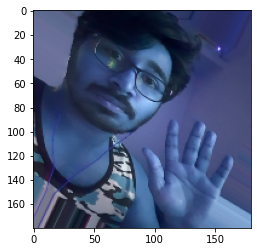

In [ ]:
i = -7
print(y_test[i], 'shape', X_test[i].shape)
plt.imshow(X[i]);

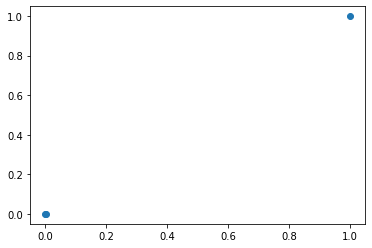

In [ ]:
plt.scatter(pred[2], pred[2])

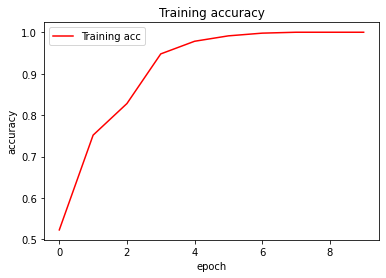

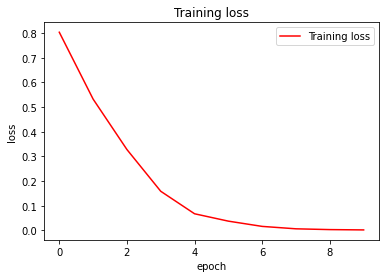

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
fist_babu = []
image = '/content/Screenshot 2021-07-24 223703.png'
img = cv2.imread(str(image))
resize_image = cv2.resize(img, (180, 180))
fist_babu.append(resize_image)
fist_babu = np.array(fist_babu)/255
fist_babu.shape

(1, 180, 180, 3)

In [ ]:
pred = cnn.predict(fist_babu)

In [ ]:
pred

array([[1.0000000e+00, 5.2786646e-08, 0.0000000e+00]], dtype=float32)

In [ ]:
cnn.save('/content/drive/MyDrive/Exported-models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Exported-models/assets


In [ ]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = cnn.to_json()


with open("model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
cnn.save_weights("model_num.h5")